In [1]:
import pandas as pd
import numpy as np
from math import sqrt, exp, log
from scipy.stats import norm
import matplotlib.pyplot as plt
from strGenerator import riskStrGenerator

In [2]:
VaRLabel_2y_window = riskStrGenerator('AAPL', 0.99, 5, 'VaR', 2, 'window', 'long')
VaRLabel_2y_exp = riskStrGenerator('AAPL', 0.99, 5, 'VaR', 2, 'exp', 'long')
ESLabel_2y_window = riskStrGenerator('AAPL', 0.99, 5, 'ES', 2, 'window', 'long')
ESLabel_2y_exp = riskStrGenerator('AAPL', 0.99, 5, 'ES', 2, 'exp', 'long')

df = pd.DataFrame(np.random.randint(200, 300, size = (50, 5)), \
    columns = ['AAPL', VaRLabel_2y_window, VaRLabel_2y_exp, ESLabel_2y_window, ESLabel_2y_exp])
df = df.join(pd.DataFrame(np.arange(50), columns = ['date']))


In [3]:
def riskPlot(df, ax_obj, riskLabel): 
    """
    A function that plot a subsplot

    Args: 
        df: original pandas.DataFrame
        ax_obj: matplotlib.pyplot.axes object
        riskLabel: the label (which is also column name) used to look up data
    Returns: 
        matplotlib.pyplot.subplots
    """

    ax_obj.plot(df['date'], df[riskLabel], label = riskLabel)

def fMethodDiffWinPlot(df, ticker, p, t, estWindowList, estMethod, position = 'long'): 
    """
    Fixed method different window. 
    A function that plots and compares different window length under the same estimation method. 

    Args: 
        df: original pandas,DataFrame
        ticker: stock ticker
        p: percentile (example: 99% ES -> p = 0.99)
        t: period of time to look ahead (in years)
        estWindowList: a list of window length to be compared (example: [2, 5, 10])
        estMethod: 'window' or 'exp'
    Returns: 
        graph
    """
    
    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 8))

    for i in range(len(estWindowList)): 
        VaRLabel = riskStrGenerator(ticker, p, t, 'VaR', estWindowList[i], estMethod, position)
        ESLabel = riskStrGenerator(ticker, p, t, 'ES', estWindowList[i], estMethod, position)
        riskPlot(df, ax[0], VaRLabel)
        ax[0].legend(loc = 'upper right')
        riskPlot(df, ax[1], ESLabel)
        ax[1].legend(loc = 'upper right')

    plt.show()    
    # for the same method, we would have a list of different window length
    return

def fWinDiffMethodPlot(df, ticker, p, t, estWindow, position = 'long'): 
    """
    Fixed window different methods. 
    A function that compares different method ('window' and 'exp') based on the same historical window
    (example: 2-y rolling window and 2-y equivalent lambda)

    For the same window, we only have two methods, rolling window and exponential weighting

    Args: 
        df: original pandas.DataFrame
        ticker: stock ticker
        p: percentile (example: 99% ES -> p = 0.99)
        t: period of time to look ahead (in years)
        estWindow: length of historical window of data to look back
        position: 'long' or 'short'
    Returns: 
        matplotlib.pyplot.subplots
    """
    
    
    VaRLabel_window = riskStrGenerator(ticker, p, t, 'VaR', estWindow, 'window', position)
    VaRLabel_exp = riskStrGenerator(ticker, p, t, 'VaR', estWindow, 'exp', position)
    ESLabel_window = riskStrGenerator(ticker, p, t, 'ES', estWindow, 'window', position)
    ESLabel_exp = riskStrGenerator(ticker, p, t, 'ES', estWindow, 'exp', position)

    labels = [[VaRLabel_window, VaRLabel_exp], [ESLabel_window, ESLabel_exp]]

    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 8))

    for i in range(len(ax)): 
        for j in range(2): 
            riskPlot(df, ax[i], riskLabel=labels[i][j])
        ax[i].legend(loc = 'upper right')

    plt.show()
    return
    # unit test passed

def fWinFMethodDiffPosition(df, ticker, p, t, estWindow, estMethod): 
    VaRLabel_long = riskStrGenerator(ticker, p, t, 'VaR', estWindow, estMethod, 'long')
    VaRLabel_short = riskStrGenerator(ticker, p, t, 'VaR', estWindow, estMethod, 'short')

    ESLabel_long = riskStrGenerator(ticker, p, t, 'ES', estWindow, estMethod, 'long')
    ESLabel_short = riskStrGenerator(ticker, p, t, 'ES', estWindow, estMethod, 'short')

    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 8))

    riskPlot(df, ax[0], VaRLabel_long)
    riskPlot(df, ax[0], VaRLabel_short)
    ax[0].legend(loc = 'upper right')

    riskPlot(df, ax[1], ESLabel_long)
    riskPlot(df, ax[1], ESLabel_short)
    ax[1].legend(loc = 'upper right')

    return

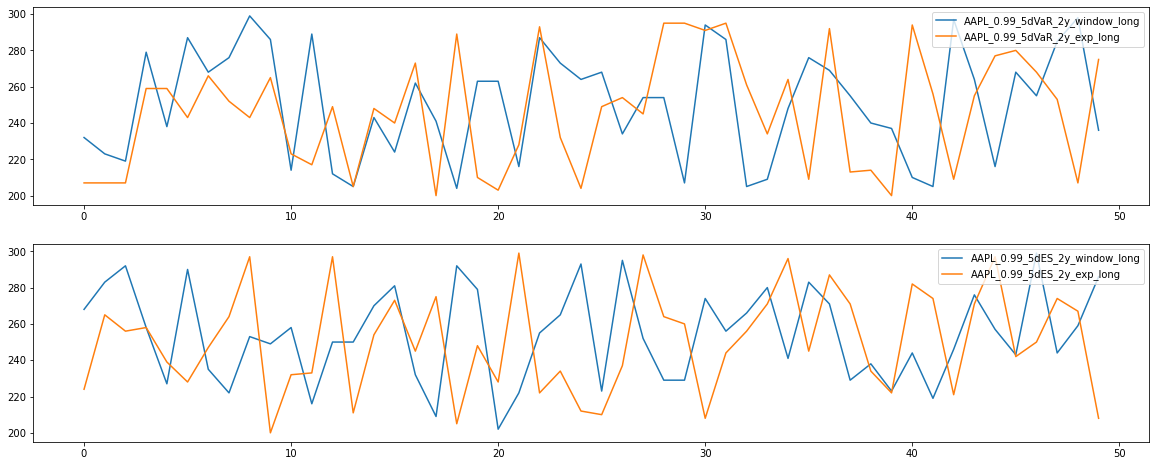

In [4]:
fWinDiffMethodPlot(df, 'AAPL', 0.99, 5, 2, 'long')

In [5]:
VaRLabel_2y = riskStrGenerator('AAPL', 0.99, 5, 'VaR', 2, 'window', 'long')
VaRLabel_5y = riskStrGenerator('AAPL', 0.99, 5, 'VaR', 5, 'window', 'long')
VaRLabel_10y = riskStrGenerator('AAPL', 0.99, 5, 'VaR', 10, 'window', 'long')

ESLabel_2y = riskStrGenerator('AAPL', 0.99, 5, 'ES', 2, 'window', 'long')
ESLabel_5y = riskStrGenerator('AAPL', 0.99, 5, 'ES', 5, 'window', 'long')
ESLabel_10y = riskStrGenerator('AAPL', 0.99, 5, 'ES', 10, 'window', 'long')


df = pd.DataFrame(np.random.randint(200, 300, size = (50, 7)), \
    columns = ['AAPL', VaRLabel_2y, VaRLabel_5y, VaRLabel_10y, ESLabel_2y, ESLabel_5y, ESLabel_10y])
df = df.join(pd.DataFrame(np.arange(50), columns = ['date']))

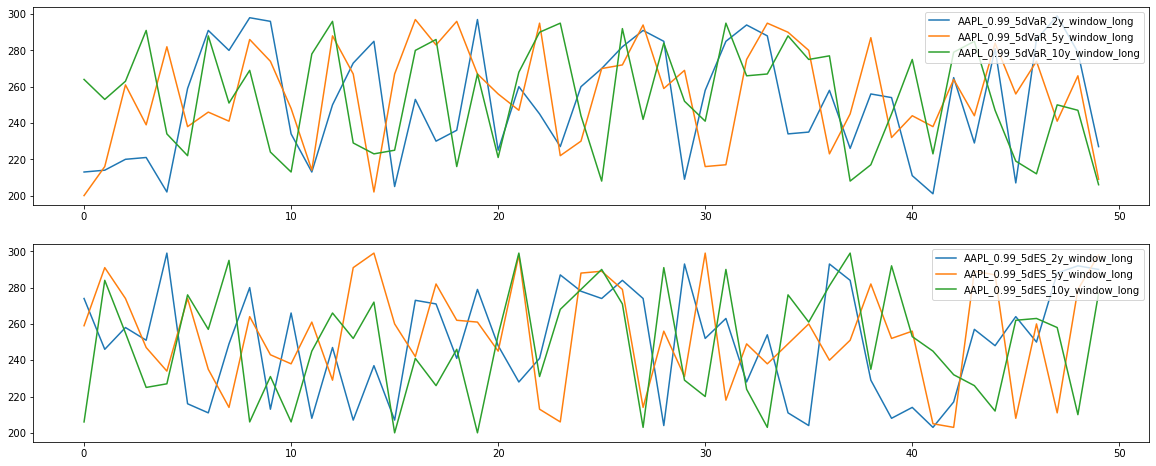

In [6]:
fMethodDiffWinPlot(df, 'AAPL', 0.99, 5, [2, 5, 10], 'window', 'long')

In [7]:
# covmdf = df[['data1', 'data2', 'data3', 'data4']].rolling(50).cov(pairwise=True)
# covmdf.loc[200].to_numpy()
# covmdf.ngroups

In [8]:
VaRLabel_long = riskStrGenerator('AAPL', 0.98, 5, 'VaR', 5, 'window', 'long')
VaRLabel_short = riskStrGenerator('AAPL', 0.98, 5, 'VaR', 5, 'window', 'short')
ESLabel_long = riskStrGenerator('AAPL', 0.98, 5, 'ES', 5, 'window', 'long')
ESLabel_short = riskStrGenerator('AAPL', 0.98, 5, 'ES', 5, 'window', 'short')

In [9]:
df = pd.DataFrame(np.random.randint(200, 300, size = (50, 5)), \
    columns = ['AAPL', VaRLabel_long, VaRLabel_short, ESLabel_long, ESLabel_short])
df = df.join(pd.DataFrame(np.arange(50), columns = ['date']))

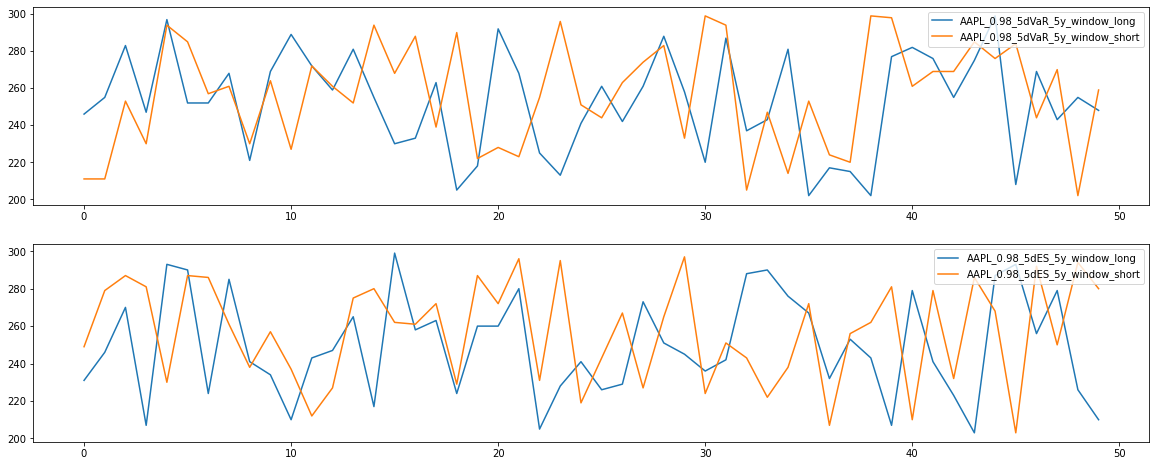

In [10]:
fWinFMethodDiffPosition(df, 'AAPL', 0.98, 5, 5, 'window')